In [1]:
import TwitterData as tw
import pandas as pd

train_column = "training_mapped_tweet_features_language"
languages = tw.get_resource(train_column)
languages

,training_mapped_tweet_features_language
0,0
1,1
2,0
3,0
4,0
...,...
148075233,3
148075234,3
148075235,3
148075236,23


In [22]:
timestamp_column = "training_raw_tweet_features_timestamp"

In [2]:
train_column = "training_raw_tweet_features_timestamp"
timestamps = tw.get_resource(train_column)
timestamps

,training_raw_tweet_features_timestamp
0,1581258144
1,1581018910
2,1581244866
3,1581250124
4,1580958805
...,...
148075233,1581073345
148075234,1581538343
148075235,1581525336
148075236,1581133279


In [7]:
language_column = "training_mapped_tweet_features_language"
languages[language_column].value_counts().sort_index()

0     23652265
1      7884887
2     10280788
3     60722973
4     13273364
        ...   
61        1963
62         363
63         614
64         138
65          14
Name: training_mapped_tweet_features_language, Length: 66, dtype: int64

In [6]:
indices = languages[languages[language_column] == 3].index
indices

Int64Index([       10,        16,        24,        25,        30,        31,
                   33,        34,        35,        38,
            ...
            148075214, 148075215, 148075216, 148075219, 148075220, 148075226,
            148075233, 148075234, 148075235, 148075237],
           dtype='int64', length=60722973)

In [10]:
mas = 65+1

times = [0 for i in range(0,mas)]

for i in range(0,mas):
    #indices = languages[languages[language_column] == 3]
    times[i] = timestamps[languages[language_column] == i]
    
times

[           training_raw_tweet_features_timestamp
 0                                     1581258144
 2                                     1581244866
 3                                     1581250124
 4                                     1580958805
 5                                     1581335128
 ...                                          ...
 148075228                             1581508047
 148075229                             1581253683
 148075230                             1581286137
 148075231                             1581455937
 148075232                             1581284752
 
 [23652265 rows x 1 columns],
            training_raw_tweet_features_timestamp
 1                                     1581018910
 32                                    1581547784
 37                                    1581433245
 43                                    1581239039
 62                                    1581427492
 ...                                          ...
 148075148        

In [47]:
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math

def getHoursFromMidnightOfCurrentDay(timestamp):
    timestamp = datetime.fromtimestamp(timestamp)
    fixed_point = timestamp.replace(hour=0,minute=0,second=0)
    difference = timestamp - fixed_point
    return math.floor(difference.seconds/60/60)

hours = [pd.Series for i in range(0,mas)]

#for i in range(0, mas):
#    plt.plot(times[i])
#    plt.show()

KeyboardInterrupt: 

In [49]:
%%time
for i in range(0, mas):
    hours[i] = times[i][timestamp_column].map(lambda x: getHoursFromMidnightOfCurrentDay(x))


CPU times: user 13min 22s, sys: 12.5 s, total: 13min 35s
Wall time: 13min 35s


In [54]:
cont = hours[0].value_counts().sort_index()
cont

0      753235
1      849881
2      934921
3     1372433
4      962491
5      893226
6      980759
7     1041243
8     1340447
9     1621597
10    1649622
11    1724573
12    1789865
13    1701465
14    1473338
15    1175791
16     611283
17     405864
18     213772
19     161395
20     190609
21     359979
22     688128
23     756348
Name: training_raw_tweet_features_timestamp, dtype: int64

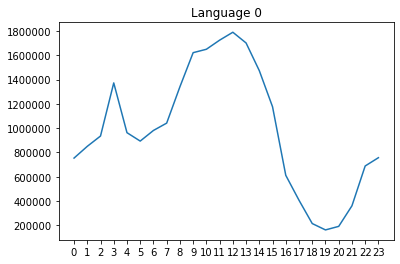

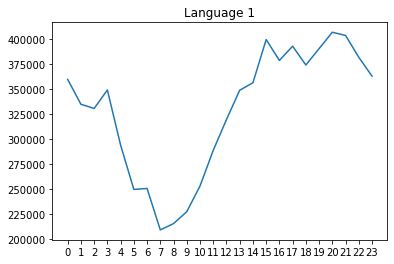

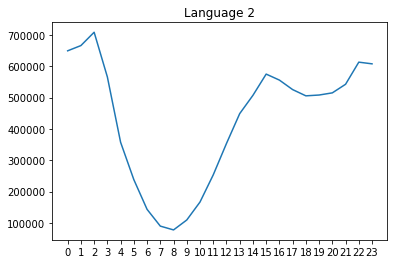

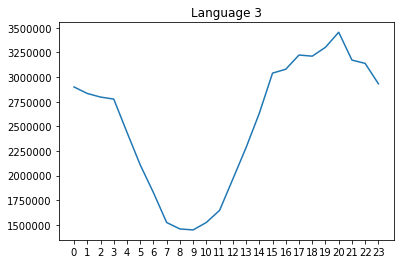

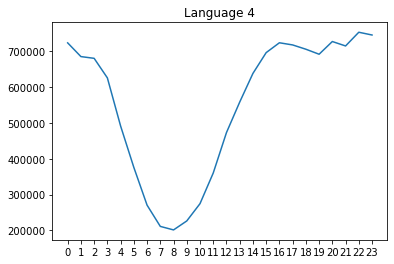

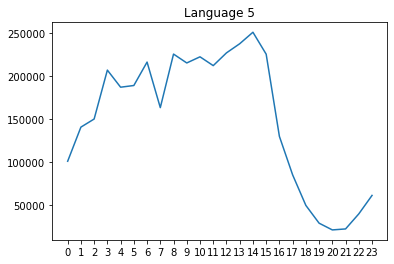

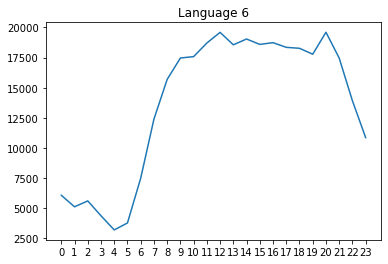

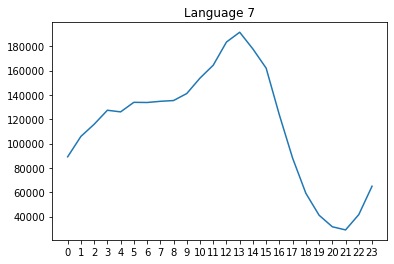

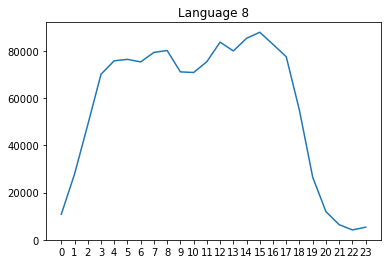

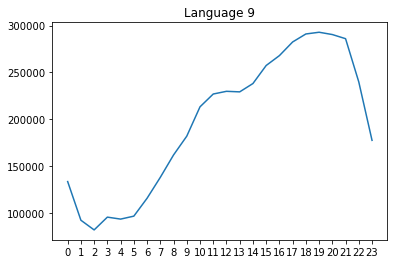

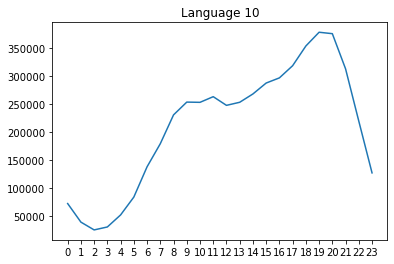

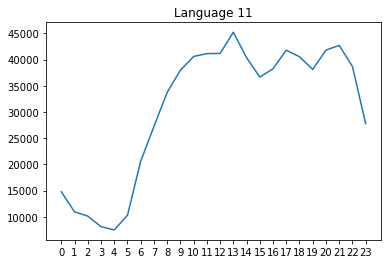

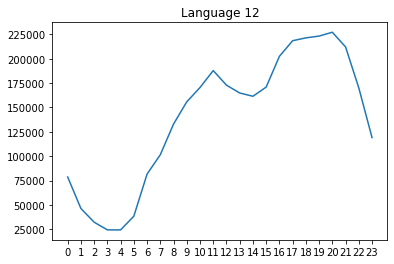

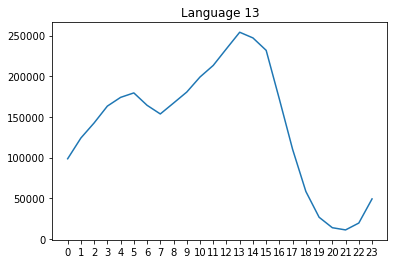

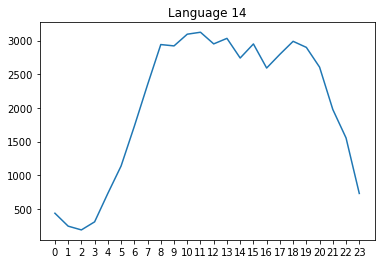

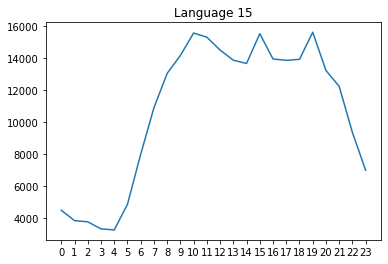

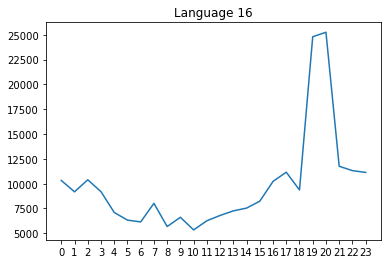

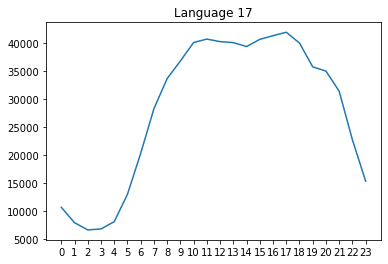

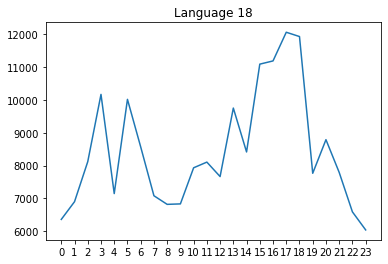

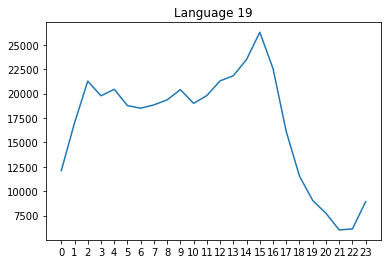

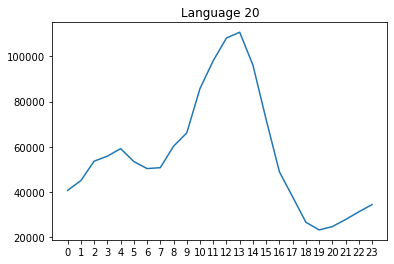

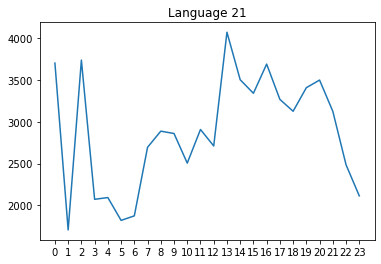

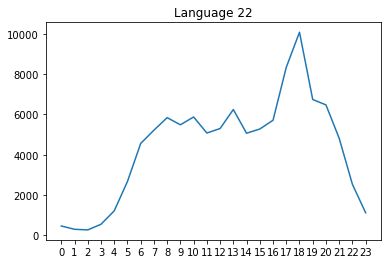

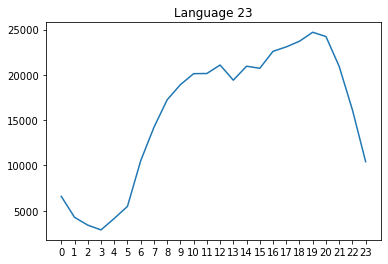

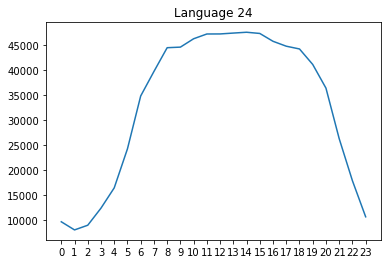

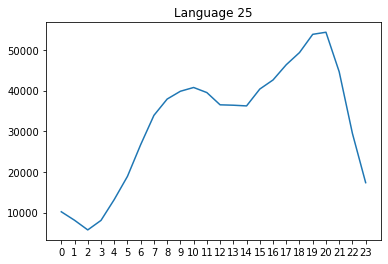

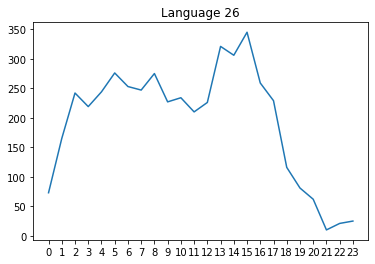

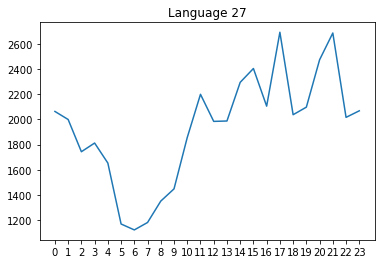

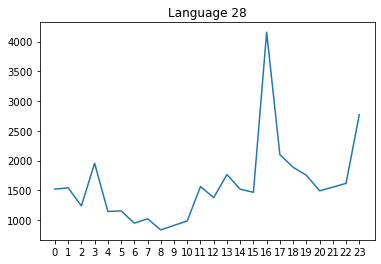

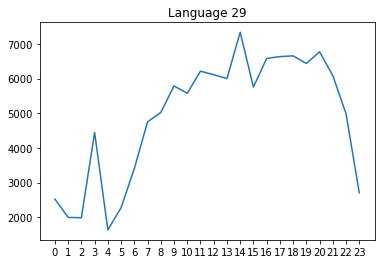

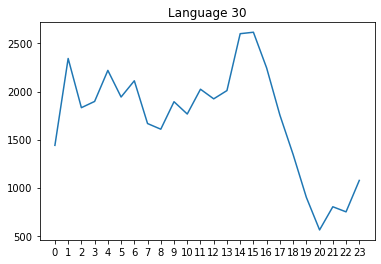

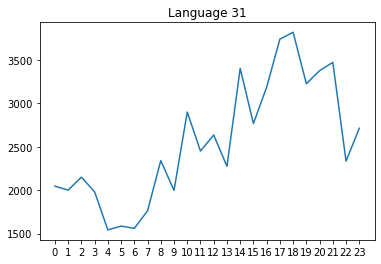

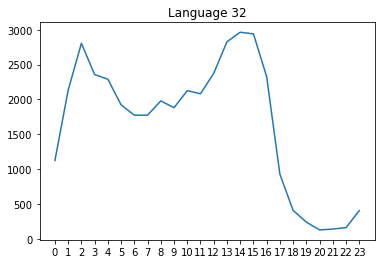

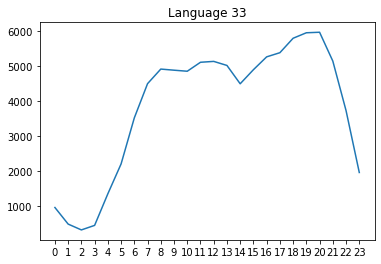

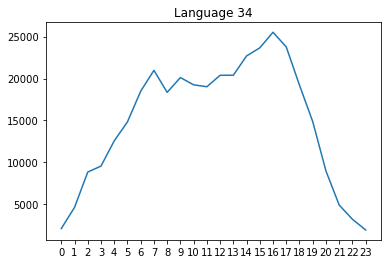

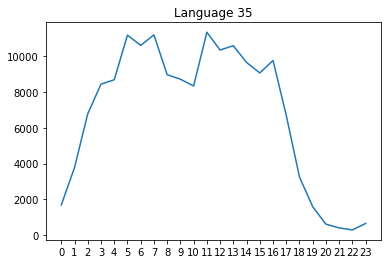

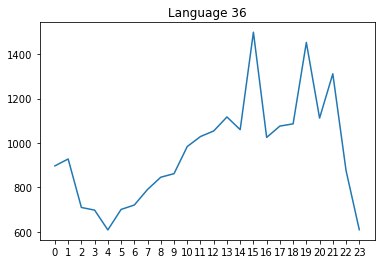

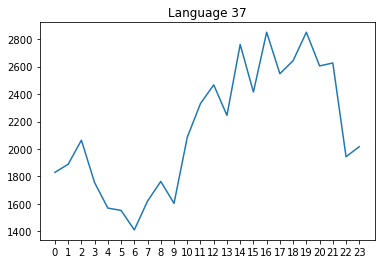

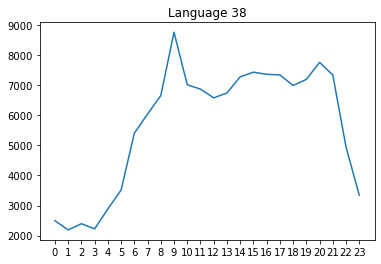

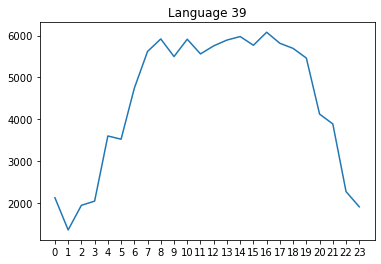

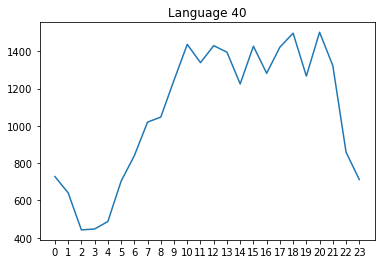

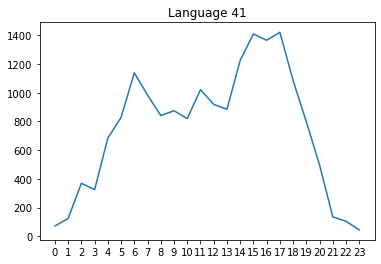

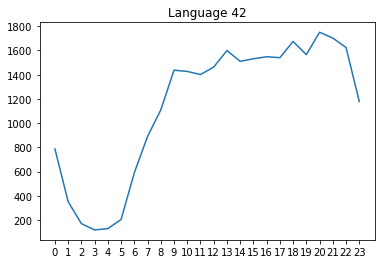

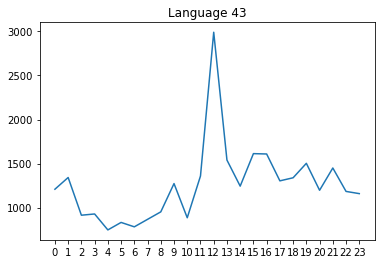

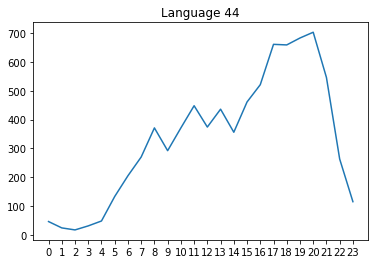

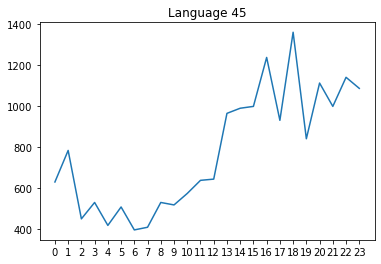

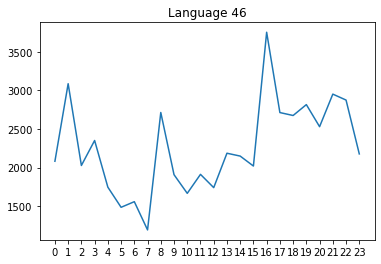

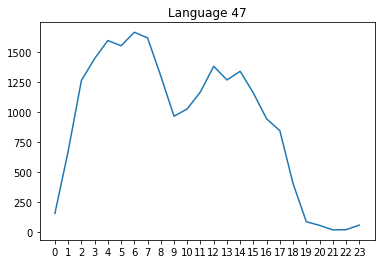

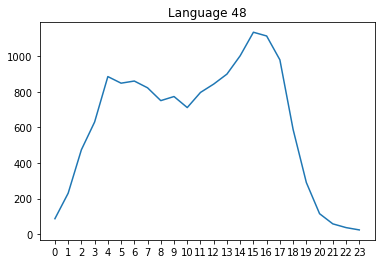

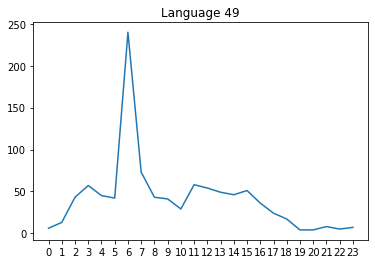

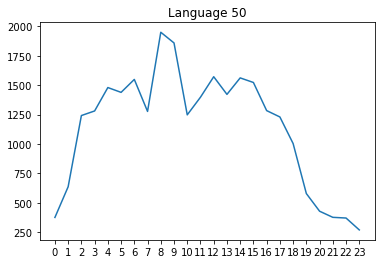

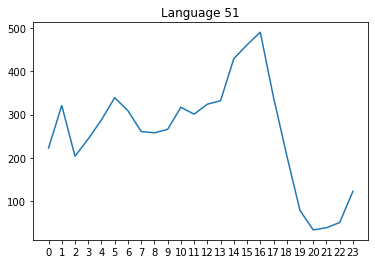

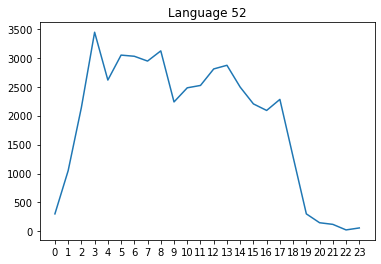

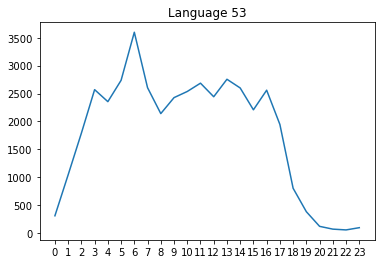

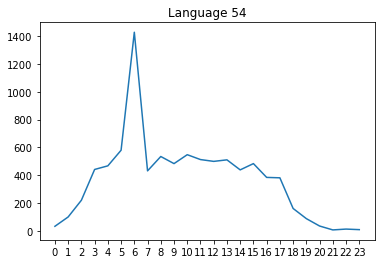

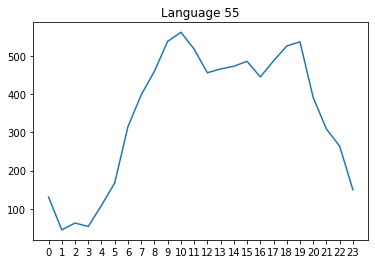

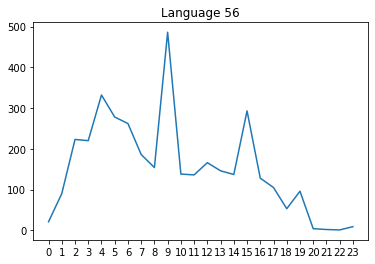

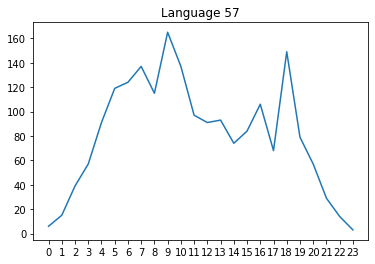

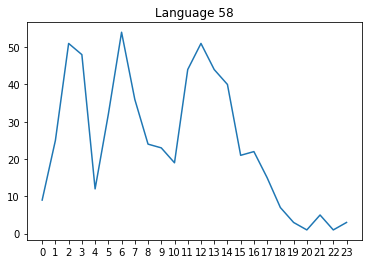

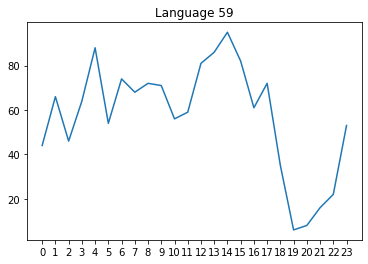

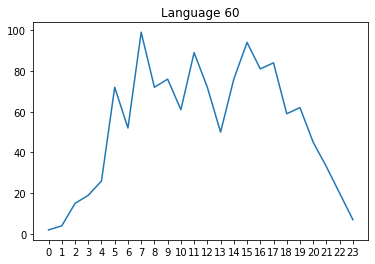

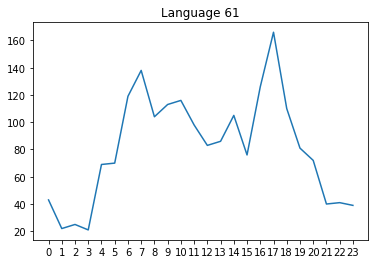

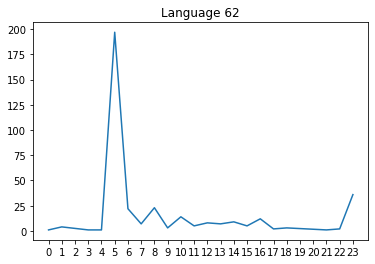

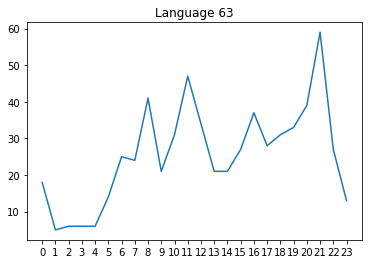

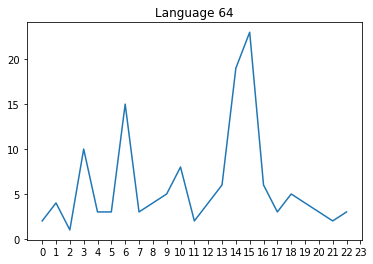

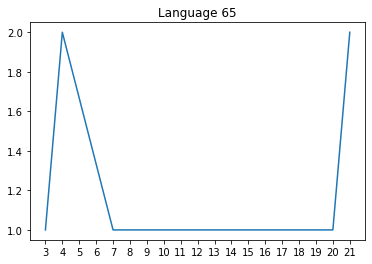

In [56]:
for i in range(0,mas):
    plt.title(f"Language {i}")
    plt.xticks(range(0,24))
    plt.plot(hours[i].value_counts().sort_index())
    plt.show()

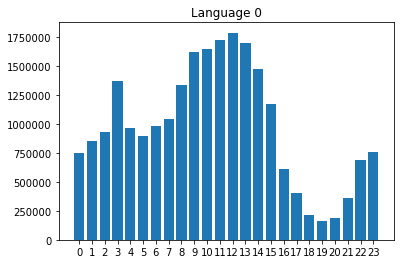

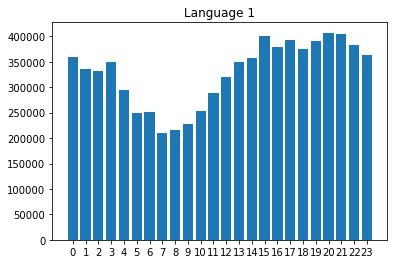

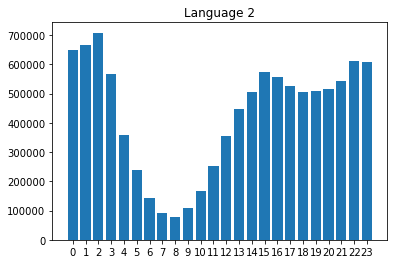

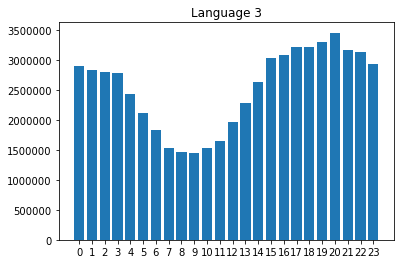

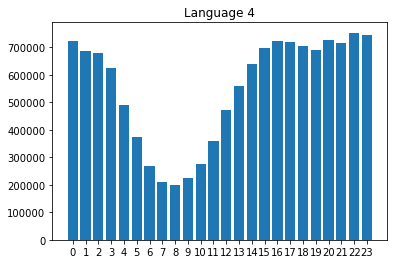

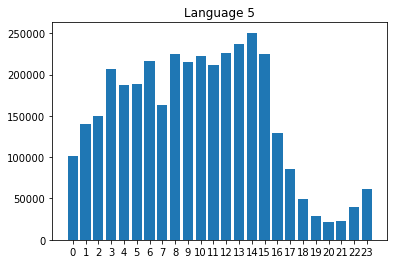

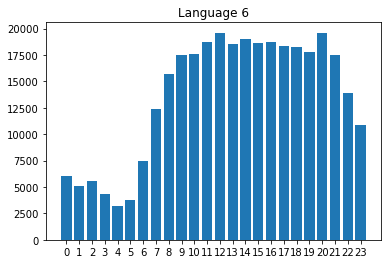

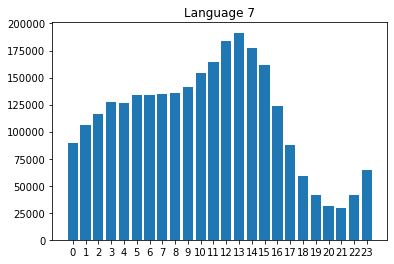

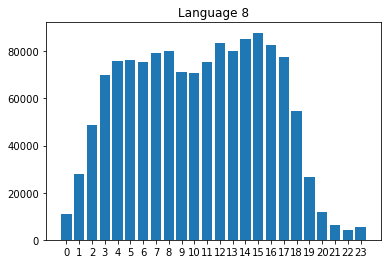

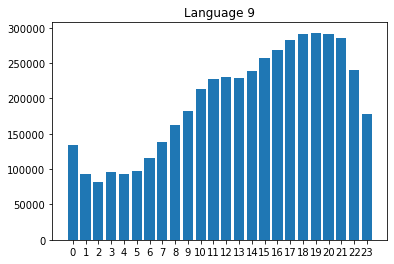

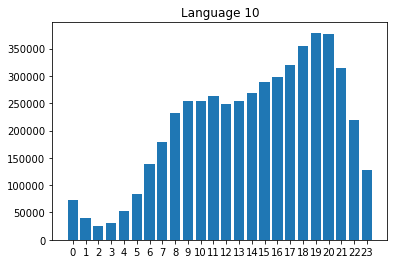

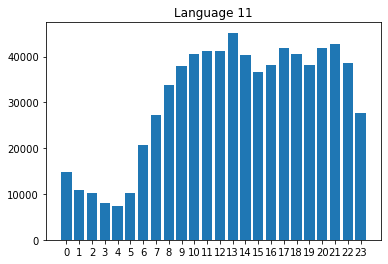

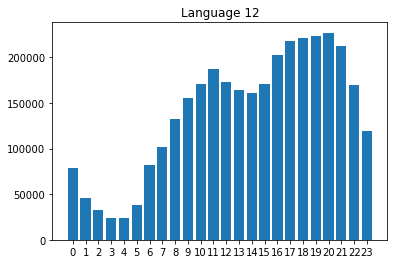

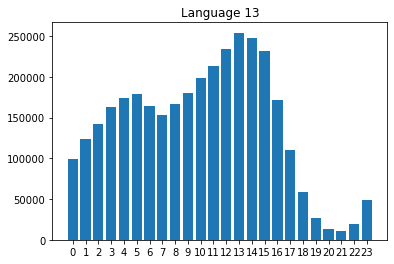

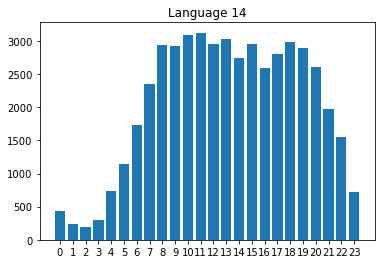

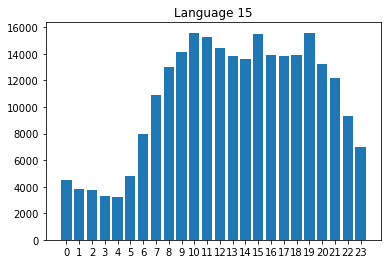

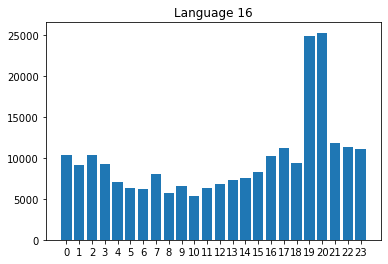

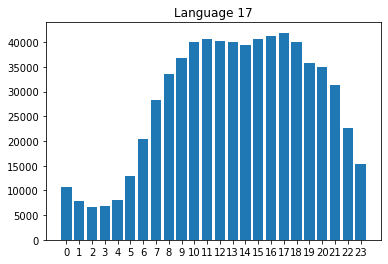

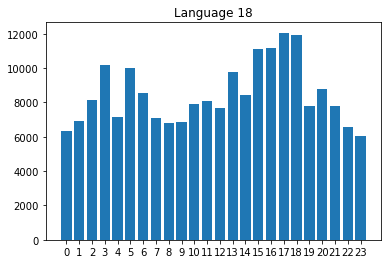

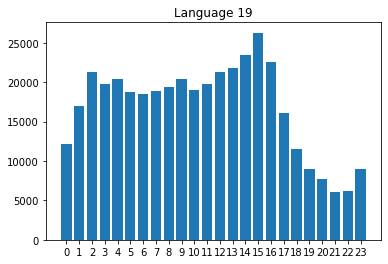

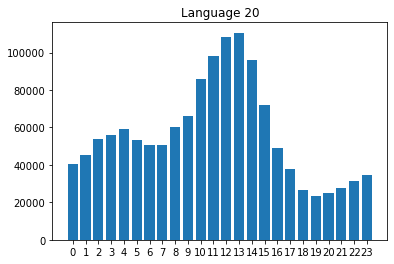

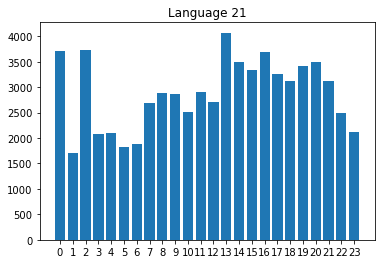

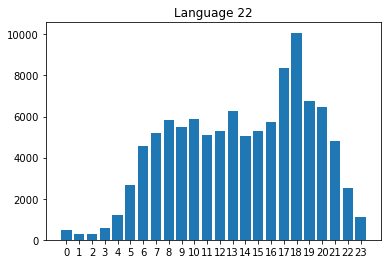

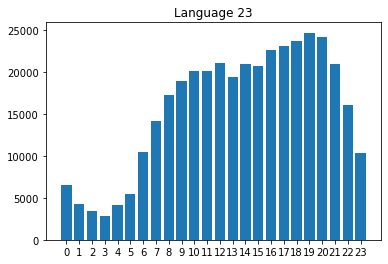

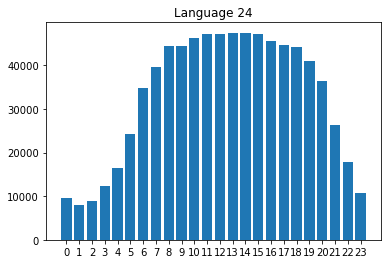

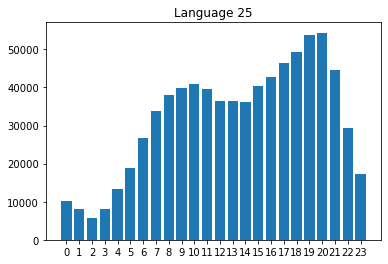

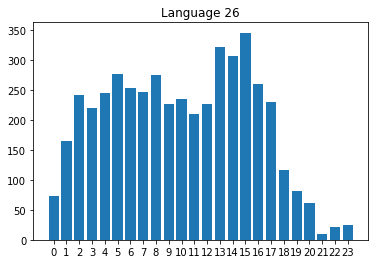

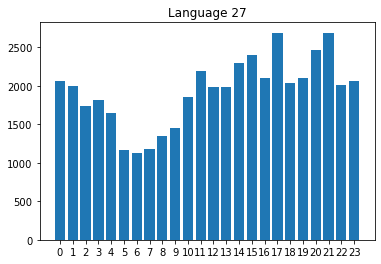

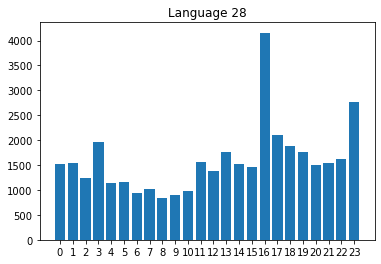

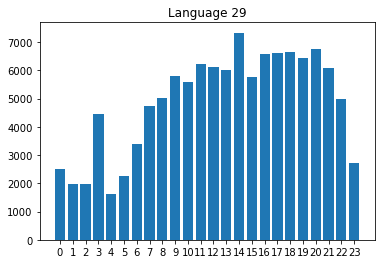

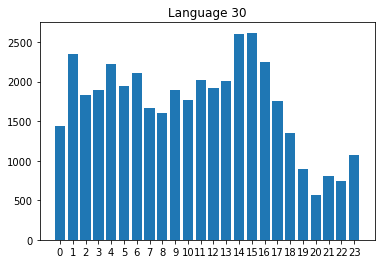

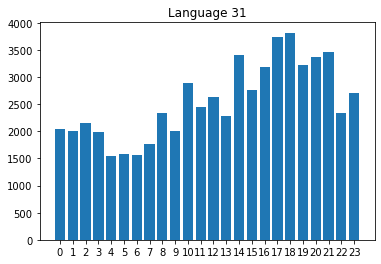

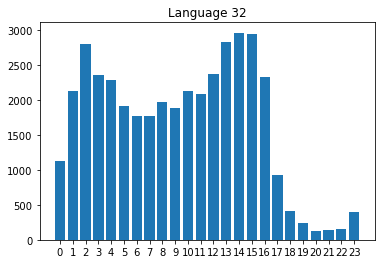

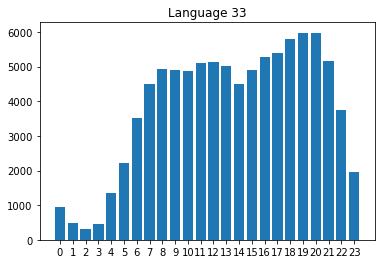

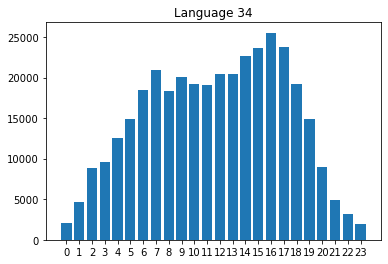

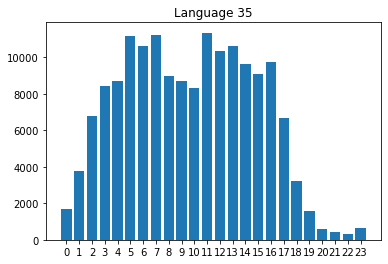

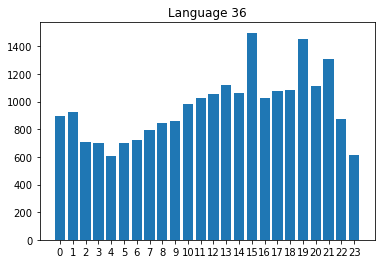

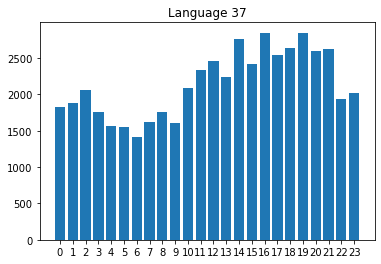

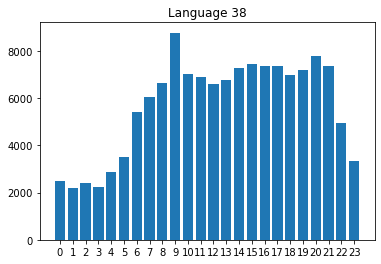

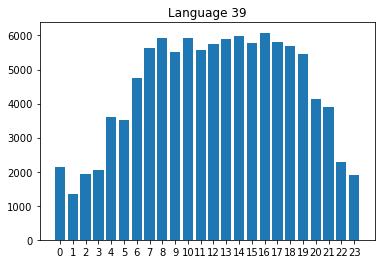

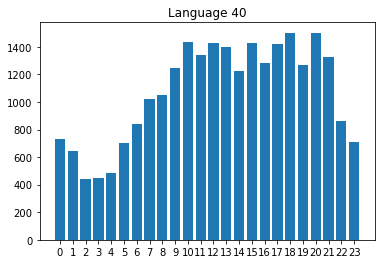

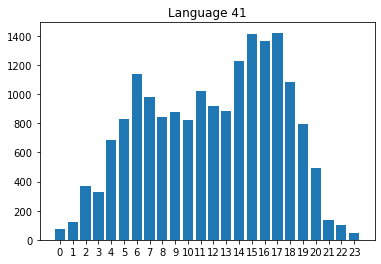

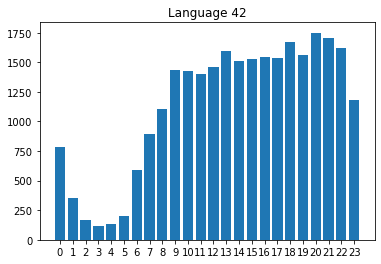

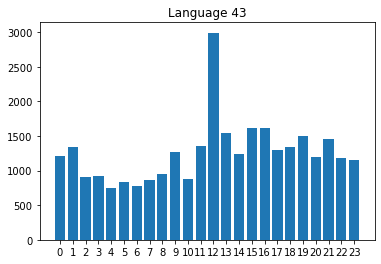

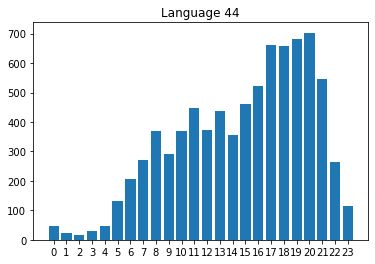

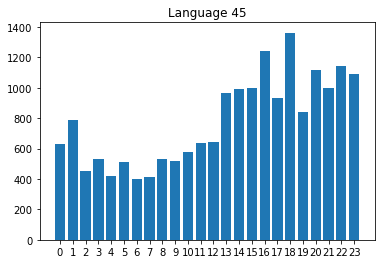

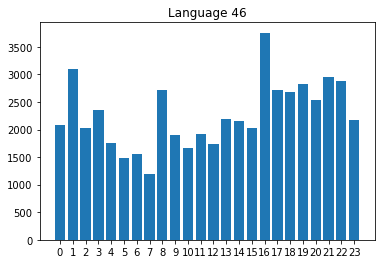

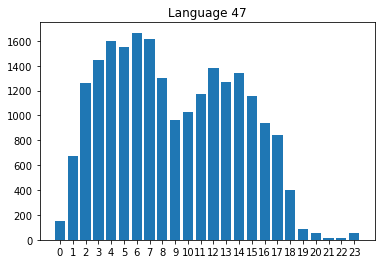

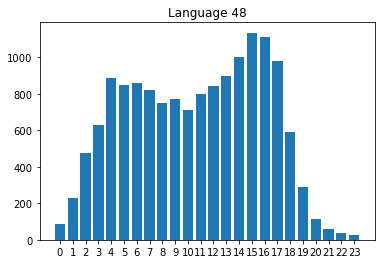

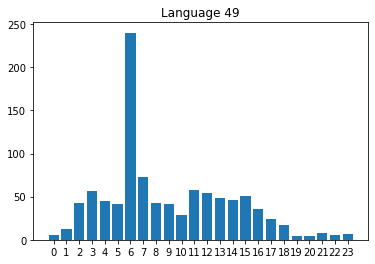

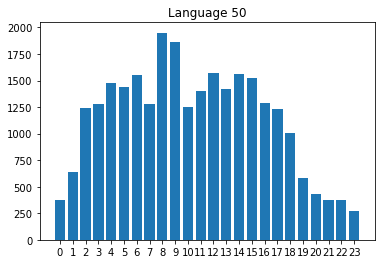

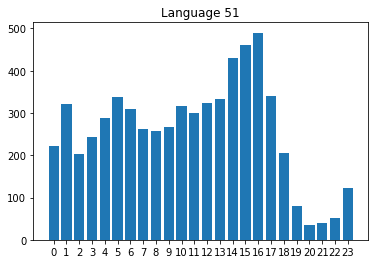

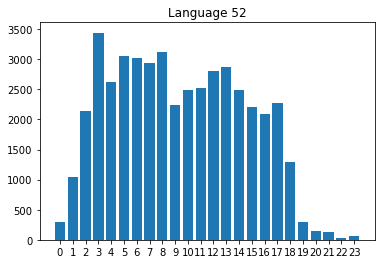

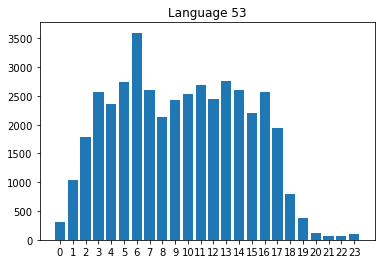

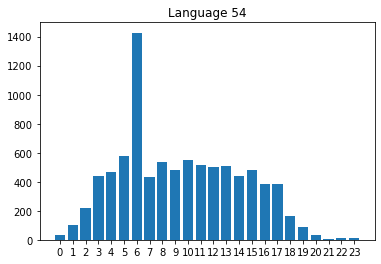

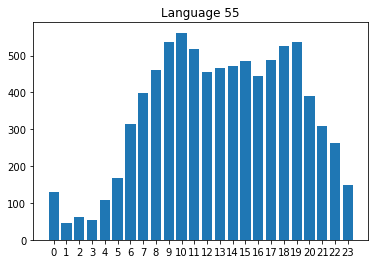

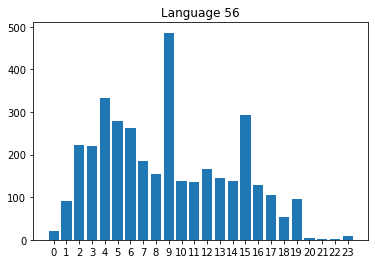

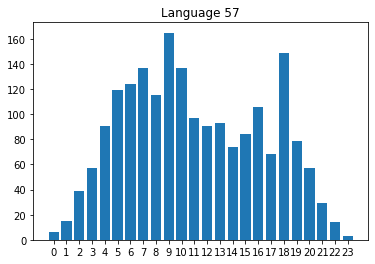

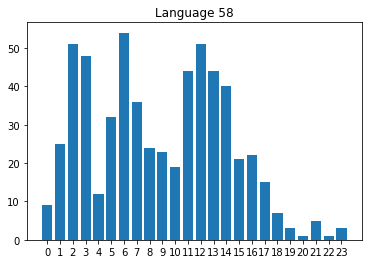

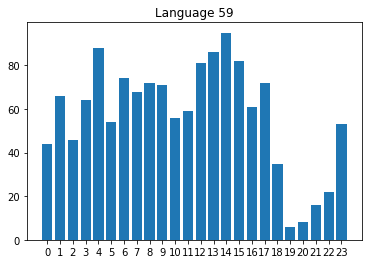

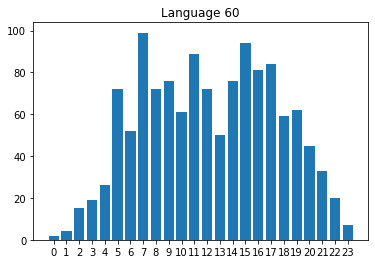

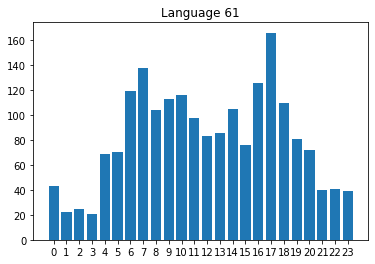

ValueError: shape mismatch: objects cannot be broadcast to a single shape

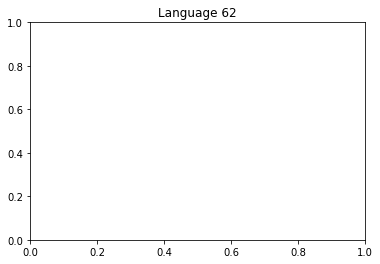

In [58]:
for i in range(0,mas):
    plt.title(f"Language {i}")
    plt.bar(x = range(0,24), y = 0, height = hours[i].value_counts().sort_index().values)
    plt.xticks(range(0,24))
    plt.show()